# MOD 5 FINAL PROJECT - WIP
- James M. Irving, Ph.D.
- 06/20/19

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MOD-5-FINAL-PROJECT---WIP" data-toc-modified-id="MOD-5-FINAL-PROJECT---WIP-1">MOD 5 FINAL PROJECT - WIP</a></span><ul class="toc-item"><li><span><a href="#Plan" data-toc-modified-id="Plan-1.1">Plan</a></span><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1.1.1">Goal</a></span></li><li><span><a href="#Data-to-Analyze" data-toc-modified-id="Data-to-Analyze-1.1.2">Data to Analyze</a></span></li><li><span><a href="#Calculating-&quot;CAPSratio&quot;" data-toc-modified-id="Calculating-&quot;CAPSratio&quot;-1.1.3">Calculating "CAPSratio"</a></span></li></ul></li><li><span><a href="#NLP" data-toc-modified-id="NLP-1.2">NLP</a></span><ul class="toc-item"><li><span><a href="#Removing-Stopwords,-Regexp-Tokenzie" data-toc-modified-id="Removing-Stopwords,-Regexp-Tokenzie-1.2.1">Removing Stopwords, Regexp Tokenzie</a></span></li><li><span><a href="#Identifying-Hashtags,-Mentions,-URLs" data-toc-modified-id="Identifying-Hashtags,-Mentions,-URLs-1.2.2">Identifying Hashtags, Mentions, URLs</a></span></li><li><span><a href="#Generating-Frequency-Distribtuions" data-toc-modified-id="Generating-Frequency-Distribtuions-1.2.3">Generating Frequency Distribtuions</a></span></li><li><span><a href="#Creating-Bigrams-and-PMI-scores" data-toc-modified-id="Creating-Bigrams-and-PMI-scores-1.2.4">Creating Bigrams and PMI scores</a></span></li><li><span><a href="#PMI" data-toc-modified-id="PMI-1.2.5">PMI</a></span></li><li><span><a href="#Sentiment-Analysis" data-toc-modified-id="Sentiment-Analysis-1.2.6">Sentiment Analysis</a></span></li></ul></li></ul></li><li><span><a href="#BOOKMARK" data-toc-modified-id="BOOKMARK-2">BOOKMARK</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#IDEA---PLOT-OUT-SENTIMENT-SCORES-IN-3-D" data-toc-modified-id="IDEA---PLOT-OUT-SENTIMENT-SCORES-IN-3-D-2.0.1">IDEA - PLOT OUT SENTIMENT SCORES IN 3-D</a></span></li><li><span><a href="#PCA---JOYCE-FUNCTIONS" data-toc-modified-id="PCA---JOYCE-FUNCTIONS-2.0.2">PCA - JOYCE FUNCTIONS</a></span></li></ul></li></ul></li><li><span><a href="#Stock-Market-Data" data-toc-modified-id="Stock-Market-Data-3">Stock Market Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Other-Stock-Market-Data-Sources" data-toc-modified-id="Other-Stock-Market-Data-Sources-3.0.1">Other Stock Market Data Sources</a></span></li><li><span><a href="#Using-Yahoo-Daily-S&amp;P500-with-Tweets" data-toc-modified-id="Using-Yahoo-Daily-S&amp;P500-with-Tweets-3.0.2">Using Yahoo Daily S&amp;P500 with Tweets</a></span></li></ul></li></ul></li></ul></div>

## Plan

### Goal
- Goal is to use President Trump's tweets to predict fluctuations in the stock market.

### Data to Analyze
- **TWEETS:**
    - All Donald Trump tweets from inaugaration day 2017 to today (for now) - 06/20/19
        - Extracted from http://www.trumptwitterarchive.com/archive
        - Copy and pasted .csv into "../trump_tweets_01202017_06202019.csv"
        
- **STOCK MARKET:**
    - Must extract historical stock market data using an API.
    - Question of what time frequency is possible using free APIs.
    - Options:
        1. Using AlphaVantage (api_key in parent folder) and `alpha_vantage` [python package](https://github.com/RomelTorres/alpha_vantage)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = '../trump_tweets_01202017_06202019.csv'
df = pd.read_csv(file, encoding='utf-8')
df.rename(axis=1,mapper={'text':'content','created_at':'date'},inplace=True)
df['date']=pd.to_datetime(df['date'])
df.head()

,source,content,date,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Since Election Day 2016 Stocks up almost 50% S...,2019-06-20 00:12:31,16742,64362,False,1141499029727121408
1,Twitter for iPhone,Congratulations to President Lopez Obrador — M...,2019-06-19 23:01:59,20490,87423,False,1141481280653209600
2,Twitter for iPhone,Just returning from Orlando and Doral (Miami) ...,2019-06-19 20:39:28,12693,68118,False,1141445414824136704
3,Twitter for iPhone,I will be interviewed LIVE tonight by @seanhan...,2019-06-19 20:29:24,10586,48786,False,1141442879518322689
4,Twitter for iPhone,....asking Hillary Clinton why she deleted and...,2019-06-19 19:48:04,21712,93137,False,1141432478491717632


In [2]:
print(' First tweet:',df.date.min(),'\n','Last tweet:',df.date.max())
print('\nRange of Dates: ',df.date.max() - df.date.min())

 First tweet: 2017-01-20 12:31:53 
 Last tweet: 2019-06-20 00:12:31

Range of Dates:  880 days 11:40:38


In [3]:
from pandas_profiling import ProfileReport
ProfileReport(df)

Number of variables,7
Number of observations,8442
Total Missing (%),0.1%
Total size in memory,461.8 KiB
Average record size in memory,56.0 B
Numeric,3
Categorical,3
Boolean,0
Date,1
Text (Unique),0
Rejected,0


In [4]:
df.head()

,source,content,date,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Since Election Day 2016 Stocks up almost 50% S...,2019-06-20 00:12:31,16742,64362,False,1141499029727121408
1,Twitter for iPhone,Congratulations to President Lopez Obrador — M...,2019-06-19 23:01:59,20490,87423,False,1141481280653209600
2,Twitter for iPhone,Just returning from Orlando and Doral (Miami) ...,2019-06-19 20:39:28,12693,68118,False,1141445414824136704
3,Twitter for iPhone,I will be interviewed LIVE tonight by @seanhan...,2019-06-19 20:29:24,10586,48786,False,1141442879518322689
4,Twitter for iPhone,....asking Hillary Clinton why she deleted and...,2019-06-19 19:48:04,21712,93137,False,1141432478491717632


### Calculating "CAPSratio" 
- \# of uppercase chars/ # of lowercase chars

In [5]:
# test = df['text'][3]
# print(test)

# test_upper = [1 for x in test if x.isupper()]
# test_lower = [1 for x in test if x.islower()]
# test_ratio = sum(test_upper) /sum(test_lower)
# print(f"\t# CAPS/Total Chars = {test_ratio*100:.2f}%")

In [6]:
def case_ratio(msg):
    """Accepts a twitter message (or used with .apply(lambda x:)).
    Returns the ratio of capitalized characters out of the total number of characters."""
    import numpy as np
    msg_length = len(msg)
    test_upper = [1 for x in msg if x.isupper()]
    test_lower = [1 for x in msg if x.islower()]
    test_ratio = np.round(sum(test_upper)/msg_length,5)
    return test_ratio

In [7]:
df['case_ratio'] = df['content'].apply(lambda x: case_ratio(x))
df.sort_values('case_ratio',ascending=False).head()

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,case_ratio
175,Twitter for iPhone,PRESIDENTIAL HARASSMENT!,2019-06-11 11:51:43,22053,96769,False,1138413497858101249,0.91667
519,Twitter for iPhone,PRESIDENTIAL HARASSMENT!,2019-05-22 10:03:51,25473,108688,False,1131138596109463553,0.91667
1788,Twitter for iPhone,PRESIDENTIAL HARASSMENT!,2019-03-08 12:34:24,18854,84483,False,1103997393073254400,0.91667
1816,Twitter for iPhone,PRESIDENTIAL HARASSMENT!,2019-03-05 14:12:28,27152,115800,False,1102934910900363266,0.91667
1255,Twitter for iPhone,PRESIDENTIAL HARASSMENT!,2019-04-18 12:07:08,30697,145842,False,1118848431932493824,0.91667


## NLP

- [ ] Paste in relevant code from my mod4 project 

### Removing Stopwords, Regexp Tokenzie

In [8]:
# Generate Stopwords List from nltk + punctuation + custom list
from nltk import regexp_tokenize
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

from nltk.corpus import stopwords
import string

stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['http','https','...','…','``','co','“','’','‘','”',"n't","''",'u','s',"'s",'|','\\|','amp',"i'm"]
stopwords_list += [0,1,2,3,4,5,6,7,8,9]

## Adding in stopword removal to the actual dataframe
def apply_stopwords(stopwords_list,  text, tokenize=True, pattern = "([a-zA-Z]+(?:'[a-z]+)?)"):

    if tokenize==True:
        from nltk import regexp_tokenize
        
        text = regexp_tokenize(text,pattern)
        
    stopped = [x.lower() for x in text if x.lower() not in stopwords_list]
    return ' '.join(stopped)

In [9]:
# # Remove stopwords using function apply_stopwords)
# df['text_stopped'] = df['content'].apply(lambda x: apply_stopwords(stopwords_list,x))

# # Tokenize using regexp_tokenize from nltk
# df['tokens_stopped'] = df['content'].apply(lambda x: regexp_tokenize(x,pattern))

In [10]:
df.head(2)

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,case_ratio
0,Twitter for iPhone,Since Election Day 2016 Stocks up almost 50% S...,2019-06-20 00:12:31,16742,64362,False,1141499029727121408,0.05495
1,Twitter for iPhone,Congratulations to President Lopez Obrador — M...,2019-06-19 23:01:59,20490,87423,False,1141481280653209600,0.08571


### Identifying Hashtags, Mentions, URLs

In [11]:
# # Save 'hashtags' column containing all hastags
# import re

# # Remove `RT @Mentions` FIRST:
# re_RT = re.compile('RT [@]?\w*:')

# # Remove urls with regex
# urls = re.compile(r"(http[s]?://\w*\.\w*/+\w+)")

# # Remove and save Hashtags
# hashtags = re.compile(r'\#\w*')


In [12]:
# Save 'hashtags' column containing all hastags
import re
df['content_raw'] = df['content'].copy()

# Add has_RT and starts_RT columns
# Creating columns for tweets that `has_RT` or `starts_RT`
df['has_RT']=df['content_raw'].str.contains('RT')
df['starts_RT']=df['content_raw'].str.contains('^RT')

## FIRST REMOVE THE RT HEADERS

# Remove `RT @Mentions` FIRST:
re_RT = re.compile('RT [@]?\w*:')

raw_col =  'content_raw'
check_content_col =raw_col
fill_content_col = 'content'

df['content_starts_RT'] = df[check_content_col].apply(lambda x: re_RT.findall(x))
df[fill_content_col] =  df[check_content_col].apply(lambda x: re_RT.sub(' ',x))


## SECOND REMOVE URLS
# Remove urls with regex
urls = re.compile(r"(http[s]?://\w*\.\w*/+\w+)")

check_content_col = 'content'
fill_content_col = 'content'

# df_full['content_urls'] = df_full[check_content_col].apply(lambda x: urls.findall(x))
df[fill_content_col] =  df[check_content_col].apply(lambda x: urls.sub(' ',x))

## SAVE THIS MINIMALLY CLEANED CONTENT AS 'content_min_clean'
df['content_min_clean'] =  df[fill_content_col]



## REMOVE AND SAVE HASHTAGS, MENTIONS
# Remove and save Hashtags
hashtags = re.compile(r'\#\w*')

check_content_col = 'content'
fill_content_col = 'content'

df['content_hashtags'] =  df[check_content_col].apply(lambda x: hashtags.findall(x))
df[fill_content_col] =  df[check_content_col].apply(lambda x: hashtags.sub(' ',x))


# Remove and save mentions (@)'s
mentions = re.compile(r'\@\w*')

check_content_col = 'content'
fill_content_col = 'content'

df['content_mentions'] =  df[check_content_col].apply(lambda x: mentions.findall(x))
df[fill_content_col] =  df[check_content_col].apply(lambda x: mentions.sub(' ',x))


# Creating content_stopped columns and then tokens_stopped column
df['content_stopped'] = df['content'].apply(lambda x: apply_stopwords(stopwords_list,x))
df['tokens_stopped'] = df['content_stopped'].apply(lambda x: regexp_tokenize(x,pattern))

In [13]:
# Issue of empty entries for hashtags interfering with joining.
def empty_lists_to_strings(x):
    """Takes a series and replaces any empty lists with an empty string instead."""
    if len(x)==0:
        return ' '
    else:
        return ' '.join(x) #' '.join(tokens)
    
    
# Apply empty_lists_to_strings to hashtags
df['hashtag_strings'] = df['content_hashtags'].apply(lambda x: empty_lists_to_strings(x))

# Apply empty_lists_to_strings to mentions
df['mention_strings'] = df['content_mentions'].apply(lambda x: empty_lists_to_strings(x))

In [14]:
df.head(2)

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,case_ratio,content_raw,has_RT,starts_RT,content_starts_RT,content_min_clean,content_hashtags,content_mentions,content_stopped,tokens_stopped,hashtag_strings,mention_strings
0,Twitter for iPhone,Since Election Day 2016 Stocks up almost 50% S...,2019-06-20 00:12:31,16742,64362,False,1141499029727121408,0.05495,Since Election Day 2016 Stocks up almost 50% S...,False,False,[],Since Election Day 2016 Stocks up almost 50% S...,[],"[@LouDobbs, @TuckerCarlson, @seanhannity, @Ing...",since election day stocks almost stocks gained...,"[since, election, day, stocks, almost, stocks,...",,@LouDobbs @TuckerCarlson @seanhannity @Ingraha...
1,Twitter for iPhone,Congratulations to President Lopez Obrador — M...,2019-06-19 23:01:59,20490,87423,False,1141481280653209600,0.08571,Congratulations to President Lopez Obrador — M...,False,False,[],Congratulations to President Lopez Obrador — M...,[],[],congratulations president lopez obrador mexico...,"[congratulations, president, lopez, obrador, m...",,


### Generating Frequency Distribtuions

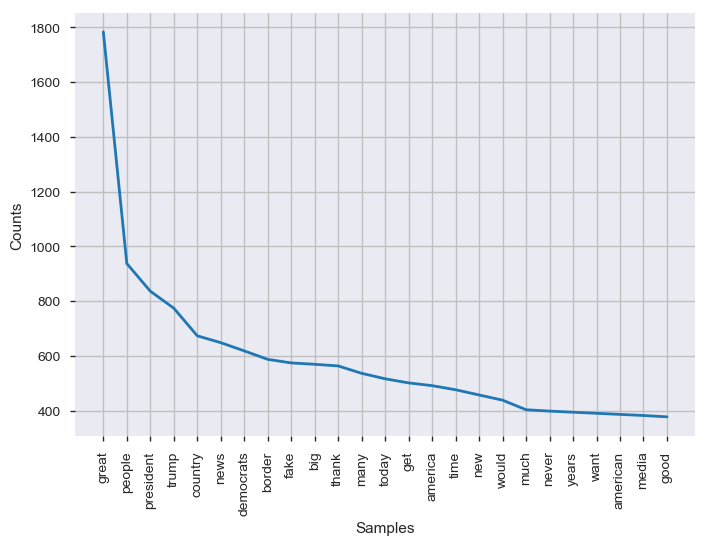

In [15]:
column = 'content_stopped'
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

tweets_combined = df[column]
tweets_combined = ' '.join(tweets_combined)
tweets_tokenized = regexp_tokenize(tweets_combined, pattern)

# CREATING TEXT DICT FOR FREQUENCY DISTRIBUTIONS
TEXT = dict()
TEXT['tokens'] = tweets_tokenized
TEXT['text'] = tweets_combined

# Frequency Distributions with NLTK FreqDist
from nltk import FreqDist
freq_tweets = FreqDist(TEXT['tokens'])
with plt.style.context('seaborn-notebook'):
    freq_tweets.plot(25)
    

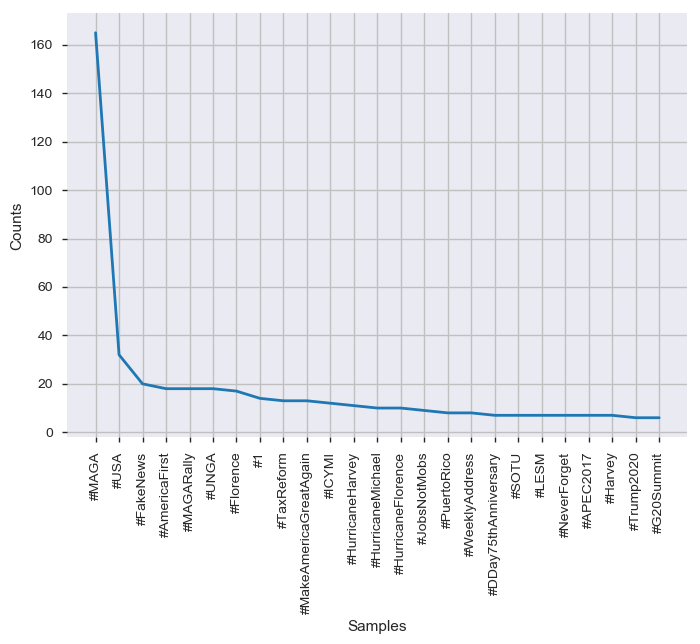

In [16]:
# CREATING HASHTAG DICT
column = 'hashtag_strings'
tag_pattern ='(#\w*)'
tags_combined = df[column]
tags_combined = ' '.join(tags_combined)
tags_tokenized = regexp_tokenize(tags_combined, tag_pattern)

TAGS = dict()
TAGS['tokens'] = tags_tokenized
TAGS['text'] = tags_combined

# Frequency Distributions with NLTK FreqDist
from nltk import FreqDist
freq_tags = FreqDist(TAGS['tokens'])
with plt.style.context('seaborn-notebook'):
    freq_tags.plot(25)

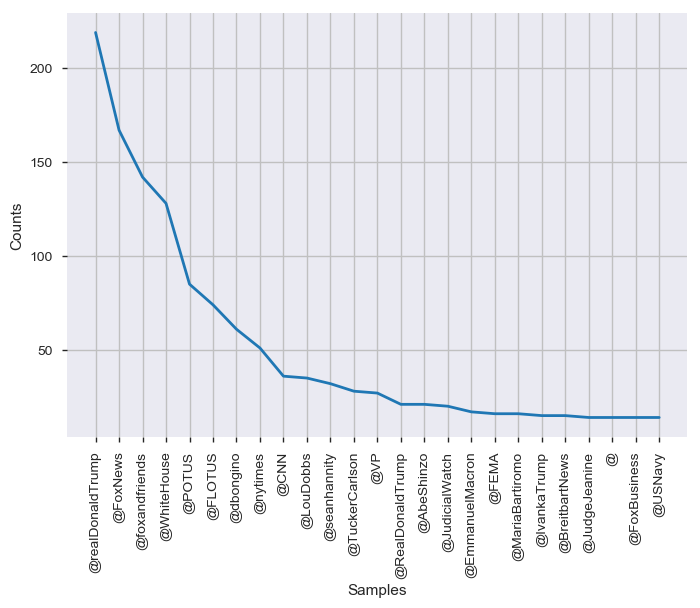

In [17]:
# CREATING METNION DICT
column = 'mention_strings'
at_pattern ='(@\w*)'
ats_combined = df[column]
ats_combined = ' '.join(ats_combined)
ats_tokenized = regexp_tokenize(ats_combined, at_pattern)

ATS = dict()
ATS['tokens'] = ats_tokenized
ATS['text'] = ats_combined

# Frequency Distributions with NLTK FreqDist
from nltk import FreqDist
freq_ats = FreqDist(ATS['tokens'])
with plt.style.context('seaborn-notebook'):
    freq_ats.plot(25)

#### WordClouds

In [18]:
# Import mask images for shaped wordclouds
from PIL import Image

## Twitter Bird masks
mask_f_right = np.array(Image.open('figures/masks/twitter1.png'))
mask_f_left = np.array(Image.open('figures/masks/twitter1flip.png'))

# Hashtag and mentions mask 
mask_at = np.array(Image.open('figures/masks/Hashtags and Ats Masks-04.jpg'))
mask_hashtag = np.array(Image.open('figures/masks/Hashtags and Ats Masks-03.jpg'))

In [19]:
# Define wordcloud plotting function
def plot_fit_cloud(troll_cloud,label1='Most Common Words',figsize=(4,4)):
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=figsize)

    ax.imshow(troll_cloud, interpolation='gaussian')
    # ax[0].set_aspect(1.5)
    ax.axis("off")
    ax.set_title(label1, fontsize=20)
    return fig, ax

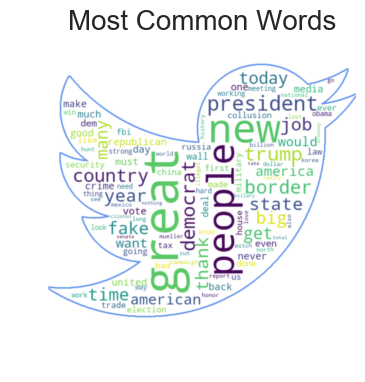

In [20]:
# Instantiazting wordcloud and defining properties
from wordcloud import WordCloud

max_font_size=100
width=300
height=300
max_words=100
background_color='white'
cloud_stopwords=[]
# collocations=False

wordcloud = WordCloud(max_font_size=max_font_size, width=width, height=height, max_words=max_words, background_color=background_color,
                        stopwords=cloud_stopwords,collocations=False,
                       mask=mask_f_right, contour_color='cornflowerblue', contour_width=2)

wordcloud.generate(TEXT['text'])
fig,ax = plot_fit_cloud(wordcloud)

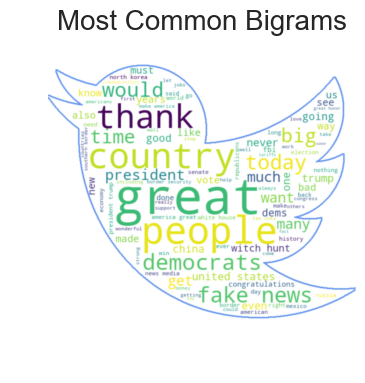

In [21]:
# Plotting bigram wordcloud
wordcloud_bigram= WordCloud(max_font_size=max_font_size, width=width, height=height, max_words=max_words,
                            background_color=background_color, collocations=True,normalize_plurals=False,
                            stopwords=[], mask=mask_f_left, contour_color='cornflowerblue', contour_width=2)
wordcloud_bigram.generate(TEXT['text'])
fig,ax = plot_fit_cloud(wordcloud_bigram, 'Most Common Bigrams')

(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17b966b2240>)

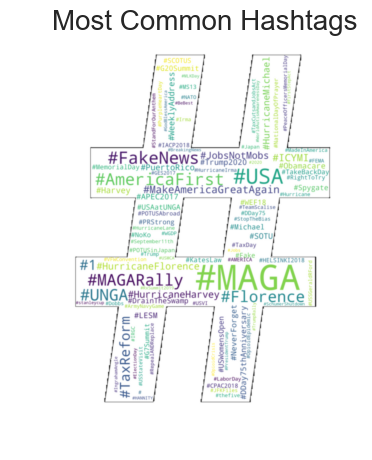

In [22]:
# Combine and Tokenize hashtags
tags = df['hashtag_strings']
tags = ' '.join(tags)
tags_tokens = regexp_tokenize(tags,'(#\w*)')


# WordClouds for Hashtags
max_font_size=300
width=300
height=300
max_words=100
background_color='white'
cloud_stopwords=[]
collocations=False
regexp=r'(#\w*)'


tag_cloud = WordCloud(max_font_size=max_font_size, width=width, height=height,
                            max_words=max_words, background_color=background_color,
                        stopwords=cloud_stopwords,collocations=collocations, regexp=regexp,
                            mask=mask_hashtag, contour_color='black', contour_width=2)#, include_numbers=True)


tag_cloud.generate(' '.join(tags_tokens))
plot_fit_cloud(tag_cloud,'Most Common Hashtags',figsize=(5,5))

(<Figure size 300x300 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17baea55668>)

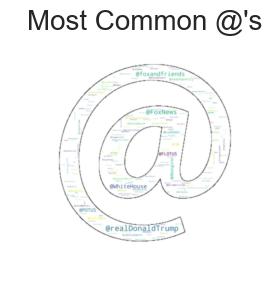

In [63]:
# Combine and Tokenize hashtags
mentions = df['mention_strings']
mentions = ' '.join(mentions)
mentions_tokens = regexp_tokenize(mentions,'(@\w*)')


# WordClouds for Mentions
max_font_size=300
width=500
height=500
max_words=200
background_color='white'
cloud_stopwords=[]
collocations=False
regexp=r'(@\w*)'

mentions_cloud = WordCloud(
    
    max_font_size=max_font_size, width=width, height=height,
    
    max_words=max_words, background_color=background_color,
    
    stopwords=cloud_stopwords,collocations=collocations, regexp=regexp,
    
    mask=mask_at, contour_color='black', contour_width=2
)#, include_numbers=True)


mentions_cloud.generate(' '.join(mentions_tokens))

plot_fit_cloud(mentions_cloud,"Most Common @'s",figsize=(3,3))

### Creating Bigrams and PMI scores

In [66]:
bs.html_on()

In [78]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
import mod4functions_JMI as jmi

bigram_measures =BigramAssocMeasures()

tweet_finder = BigramCollocationFinder.from_words(TEXT['tokens'])
tweets_scored = tweet_finder.score_ngrams(bigram_measures.raw_freq)

df_1 = jmi.quick_table(tweets_scored[:25], col_names =['Bigram','Frequency'],
                       caption='Tweet Bigrams', display_df=False)
df_1['Bigram'] = df_1['Bigram'].apply(lambda x: ' '.join(x))
df_1.set_index('Bigram',inplace=True)
df_1.columms=['Frequency']
df_1

C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  del sys.path[0]


,Frequency
Bigram,
fake news,0.003711
united states,0.002457
witch hunt,0.001814
america great,0.001493
north korea,0.001468
president trump,0.001410
white house,0.001385
news media,0.001237
border security,0.001163


### PMI

In [25]:
# troll_pmi_finder = BigramCollocationFinder.from_words(TEXT['trolls']['tokens'])
# troll_pmi_finder.apply_freq_filter(5)

# troll_pmi_scored = troll_pmi_finder.score_ngrams(bigram_measures.pmi)
# troll_pmi_df = pd.DataFrame.from_records(troll_pmi_scored[:20],columns=['Bigrams','PMI Score'])

# # display(troll_pmi_df.style.set_caption('Troll Tweets'))
# sdf1 = troll_pmi_df.set_index('Bigrams').style.set_caption('Troll Tweets')
# # quick_table(troll_pmi_scored)

### Sentiment Analysis

In [26]:
import bs_ds as bs
import mod4functions_JMI as jmi
# from bs_ds.imports import *

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

source_column='content_min_clean'
df['sentiment_scores'] = df[source_column].apply(lambda x: sid.polarity_scores(x))
df['compound_score'] = df['sentiment_scores'].apply(lambda dict: dict['compound'])
df['sentiment_class'] = df['compound_score'].apply(lambda score: 'pos' if score >=0 else 'neg')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\james\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


bs_ds v. 0.7.4 ... read the docs at https://bs-ds.readthedocs.io/en/latest/index.html
For convenient loading of standard modules :
>> from bs_ds.imports import *



In [27]:
# Write a function to extract the group scores from the dataframe
def get_group_sentiment_scores(df, score_col='sentiment_scores'):
    import pandas as pd
    series_df = df[score_col]
    series_neg = series_df.apply(lambda x: x['neg'])
    series_pos = series_df.apply(lambda x: x['pos'])
    series_neu = series_df.apply(lambda x: x['neu'])
    
    series_neg.name='neg'
    series_pos.name='pos'
    series_neu.name='neu'
    
    df = pd.concat([df,series_neg,series_neu,series_pos],axis=1)
    return df

In [28]:
df = get_group_sentiment_scores(df)
df.head()

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,case_ratio,content_raw,has_RT,...,content_stopped,tokens_stopped,hashtag_strings,mention_strings,sentiment_scores,compound_score,sentiment_class,neg,neu,pos
0,Twitter for iPhone,Since Election Day 2016 Stocks up almost 50% S...,2019-06-20 00:12:31,16742,64362,False,1141499029727121408,0.05495,Since Election Day 2016 Stocks up almost 50% S...,False,...,since election day stocks almost stocks gained...,"[since, election, day, stocks, almost, stocks,...",,@LouDobbs @TuckerCarlson @seanhannity @Ingraha...,"{'neg': 0.054, 'neu': 0.773, 'pos': 0.173, 'co...",0.7209,pos,0.054,0.773,0.173
1,Twitter for iPhone,Congratulations to President Lopez Obrador — M...,2019-06-19 23:01:59,20490,87423,False,1141481280653209600,0.08571,Congratulations to President Lopez Obrador — M...,False,...,congratulations president lopez obrador mexico...,"[congratulations, president, lopez, obrador, m...",,,"{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'comp...",0.7574,pos,0.000,0.764,0.236
2,Twitter for iPhone,Just returning from Orlando and Doral (Miami) ...,2019-06-19 20:39:28,12693,68118,False,1141445414824136704,0.08197,Just returning from Orlando and Doral (Miami) ...,False,...,returning orlando doral miami florida heading ...,"[returning, orlando, doral, miami, florida, he...",,,"{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp...",0.9081,pos,0.000,0.695,0.305
3,Twitter for iPhone,I will be interviewed LIVE tonight by on ...,2019-06-19 20:29:24,10586,48786,False,1141442879518322689,0.12987,I will be interviewed LIVE tonight by @seanhan...,False,...,interviewed live tonight p enjoy,"[interviewed, live, tonight, p, enjoy]",,@seanhannity @FoxNews,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.5411,pos,0.000,0.741,0.259
4,Twitter for iPhone,....asking Hillary Clinton why she deleted and...,2019-06-19 19:48:04,21712,93137,False,1141432478491717632,0.06604,....asking Hillary Clinton why she deleted and...,False,...,asking hillary clinton deleted acid washed ema...,"[asking, hillary, clinton, deleted, acid, wash...",,,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'comp...",-0.5719,neg,0.121,0.879,0.000


In [29]:
print("RESULTS OF SENTIMENT ANALYSIS BINARY CLASSIFICATION:\n",'-'*60)
# Normalized % of troll sentiment classes
plot_sent_class = df['sentiment_class'].value_counts()
plot_sent_class_norm = plot_sent_class/(sum(plot_sent_class))
print('\tNormalized Troll Classes:\n',plot_sent_class_norm)

RESULTS OF SENTIMENT ANALYSIS BINARY CLASSIFICATION:
 ------------------------------------------------------------
	Normalized Troll Classes:
 pos    0.694741
neg    0.305259
Name: sentiment_class, dtype: float64


# BOOKMARK

In [86]:
import seaborn as sns
x_cols = ['neg','neu','pos']
df_plot = df[x_cols]
df_plot.reset_index(inplace=True)
df_plot.head()

,date,neg,neu,pos
0,2019-06-20 00:12:31,0.054,0.773,0.173
1,2019-06-19 23:01:59,0.000,0.764,0.236
2,2019-06-19 20:39:28,0.000,0.695,0.305
3,2019-06-19 20:29:24,0.000,0.741,0.259
4,2019-06-19 19:48:04,0.121,0.879,0.000


### IDEA - PLOT OUT SENTIMENT SCORES IN 3-D

- Do PCA cuz axes are all 0-1
    - https://github.com/learn-co-students/dsc-3-34-09-principle-component-analysis-in-scikitlearn-lab-online-ds-ft-021119/tree/solution

In [152]:
import matplotlib.pyplot as plt
import matplotlib as mpl
def make_3d_data(df, cols=['neg','neu','pos'],PCA=True):
    """ Accepts a df and list of 3 columsn to return as X,Y,Z"""
    if PCA==False:
        X = df[cols[0]].values
        Y = df[cols[1]].values
        Z = df[cols[2]].values #.reshape(-1,1)
        
    elif PCA==True:
        # Run the PCA algorithm
        from sklearn.decomposition import PCA
        pca = PCA(n_components=3)
        principalComponents = pca.fit_transform(df[cols])
        
        result_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3'])

        X = result_df['PC1']
        Y = result_df['PC2']
        Z = result_df['PC3']
    return X,Y,Z

In [155]:
X, Y, Z = make_3d_data(df)
df_plot = pd.concat([X,Y,Z],axis=1 )
df_plot.head()
# print(X.shape, Y.shape, Z.shape)

# pca_out = make_3d_data(df)
# pca_out.shape


,PC1,PC2,PC3
0,-0.032219,-0.043928,0.000967
1,0.014167,-0.112821,0.009214
2,0.111092,-0.120647,0.001068
3,0.046476,-0.115430,0.006499
4,-0.222986,0.052306,0.001930


### PCA - JOYCE FUNCTIONS

In [158]:
def vec_to_col(vector_arr):
    '''
    Turns an array of vectors into columns for each vector.
    Use df['vector'].values to pass in the array of vectors.
    It gets turned into a 300-wide array with as many rows as rows in the df.
    '''
    #Make new 2d array
    data = np.array(list(vector_arr))
    
    #Make list of column names
    #Assumes all vectors have same dimensions
    columns = [str(i) for i in range(data.shape[1])]
    
    #Instantiate new df to hold vector dimensions as columns
    vector_cols = pd.DataFrame(data = data, columns = columns)

    return vector_cols

def do_pca(df, normalize = False, components = 3):    
    '''
    
    '''
    from sklearn.decomposition import PCA
    import pandas as pd
    
    #Turn vectors into columns.
    if normalize:
        from sklearn.preprocessing import StandardScaler
        vector_cols = StandardScaler().fit_transform(vec_to_col(df['vector'].values))
    else:
        vector_cols = vec_to_col(df['vector'].values)
        
    #Get principal components from features with PCA object
    pca = PCA(n_components = components)
    principalComponents = pca.fit_transform(vector_cols)

    # Create a new DataFrame for principal components 
    columns = ['PC' + str(i + 1) for i in range(principalComponents.shape[1])]
    pca_df = pd.DataFrame(data = principalComponents, columns = columns)
   
     #Add other features back
    pca_df['token'] = df['token'].values
    pca_df['vector'] = df['vector'].values
    pca_df['label'] = df['label'].values
    
    return pca_df

def get_xyz(xyz):
    '''
    Helper function for plotting.
    Parameters:
    xyz (list) List with 6 integers.
    Returns:
    6 integers in variables
    '''
    xmin, xmax, ymin, ymax, zmin, zmax = xyz[0], xyz[1], xyz[2], xyz[3], xyz[4], xyz[5]
    return xmin, xmax, ymin, ymax, zmin, zmax

def plot_pca(df, plot_list, 
             xyz = None,
             figsize = (12, 14),
             azim = 60, 
             elev = 30,
             alpha = None,
             prismXYZ = None,
             legend = False,
             title = None):
    '''
    Draws a flexible figure of subplots, with as many as are listed
    in the plot list of dictionaries. Each subplot can have one or more
    scatters drawn together depending on how many key/val pairs are in
    the dict.
    Parameters:
    df (pd.DataFrame) Needs columns for 'PC1', 'PC2', and 'PC3.'
    plot_list (list) List of dictionaries. Each dict is a subplot with as many 
    scatters as there are key/val pairs in the dict. E.g. for one plot with one scatter,
    use a list with 1 dict with 1 key/val pair.
    xyz (list) List of limits for the three dimensions.
    figsize (tuple) Size of figure.
    azim (int): Horizontal view of the plot.
    elev (int): Vertical view of the plot.
    alpha (float): Value between 0 and 1. Transparency of scatters.
    prismXYZ (dict): Dict with prism names as keys and dimension lists as values.
    legend (bool): True if a legend should be drawn.
    title (str): Title of plot (only really if just one plot being shown.)
    
    Returns: 
    Draws a plot.
    '''
    #Get xyz limits for the plots.
    if xyz:
        xmin, xmax, ymin, ymax, zmin, zmax = get_xyz(xyz)
    
    #Get right number of rows whether length is even or odd.
    #Needed this instead of just rounding because of 'banker's rounding.'
    rows = (len(plot_list) // 2) + (len(plot_list) % 2)

    #Set columns. 1 if 1 plot, else 2.
    if len(plot_list) == 1:
        cols = 1
    else:
        cols = 2
    #Draw figure to hold all plots
    fig = plt.figure(figsize = figsize)    
    
    #Draw a subplot for each dict in the plot list.
    #If just one subplot should be drawn, put just one dict in the list.
    #The plot will fill the figure.
    for i in range(len(plot_list)): 
        ax = fig.add_subplot(rows, cols, (i + 1), 
                             projection='3d', 
                             azim = azim, 
                             elev = elev)
        if xyz: 
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
            ax.set_zlim(zmin, zmax)
        
        #Draw each scatter within a subplot. 1 for each key/val pair in the dict.
        #(Allows for each subplot to show one or more scatters.)
        #together.
        for label, color in  plot_list[i].items():
            #Pull the data from the df corresponding to each label
            pca = df[df['label'] == label]
            #Draw a scatter for the data from each label
            ax.scatter(xs = pca['PC1'], 
                       ys = pca['PC2'], 
                       zs = pca['PC3'],
                       c = color,
                       alpha = alpha,
                       label = ('Chapter ' + str(label)))
        
        #Draw prisms
        if prismXYZ:
            #Draw each prism in list
            #Leaving prismXYZ as a dict for the moment in case I want to use labels
            for label, xyz in prismXYZ.items():
                draw_prism(xyz, 'black')
        
            
        #Label axes for each subplot
        ax.set_xlabel('x, PC1')
        ax.set_ylabel('y, PC2')
        ax.set_zlabel('z, PC3')
        
        #Set legend for each subplot
        if legend:
            plt.legend()
        #Set title for each subplot
        if not title:
            plt.title('Chapters: ' + str(list(plot_list[i].keys())))
        else:
            plt.title(title)
    plt.show()
    
def isolate(df, xyz):
    '''
    Parameters:
    df (pd.DataFrame) Needs a 'label' column to work. Needs PC1, 2, and 3 columns.
    xyz (list) List of limits for PC1, 2, and 3.
   
    Returns:
    blob_df (pd.DataFrame) Section of the pca_df within the 
    spatial limits set by the parameters. The 'blob' within 
    a 'cube' on a 3d plot.
    '''
    xmin, xmax, ymin, ymax, zmin, zmax = get_xyz(xyz)
    
    blob = df[
                    ((df['PC1'] > xmin) & (df['PC1'] < xmax )) & \
                    ((df['PC2'] > ymin) & (df['PC2'] < ymax )) & \
                    ((df['PC3'] > zmin) & (df['PC3'] < zmax ))
                ]
    return blob

def draw_prism(xyz, color):
    '''
    When called within plot_pca, draws a prism in a 3d plot.
    Works well with isolate() to visualize the isolated tokens.
    '''
    #1 .   2 .   3 .   4 .   5 .  6
    xmin, xmax, ymin, ymax, zmin, zmax = get_xyz(xyz)
    c = color
    plt.plot([], [], [], color = c)
    
    kwargs = {'linewidth': 4}
    
    #I tried a lot of ways of consolidating these loops further
    #but decided to move on.
    #x limits at zmin
    for x in [xmin, xmax]:
        plt.plot([x, x], [ymin, ymax], [zmin, zmin], color = c, **kwargs)

    #y limiits at zmin
    for y in [ymin, ymax]:
        plt.plot([xmin, xmax], [y, y], [zmin, zmin], color = c, **kwargs)

    #x limits at zmax
    for x in [xmin, xmax]:
        plt.plot([x, x,], [ymin, ymax,], [zmax, zmax], color = c, **kwargs)

    #y limits at zmax
    for y in [ymin, ymax]:
        plt.plot([xmin, xmax], [y, y], [zmax, zmax], color = c, **kwargs)

    #z limits
    for x in [xmin, xmax]:
        for y in [ymin, ymax]:
            plt.plot([x, x], [y, y], [zmin, zmax], color = c, **kwargs)
            

TypeError: scatter() missing 1 required positional argument: 'ys'

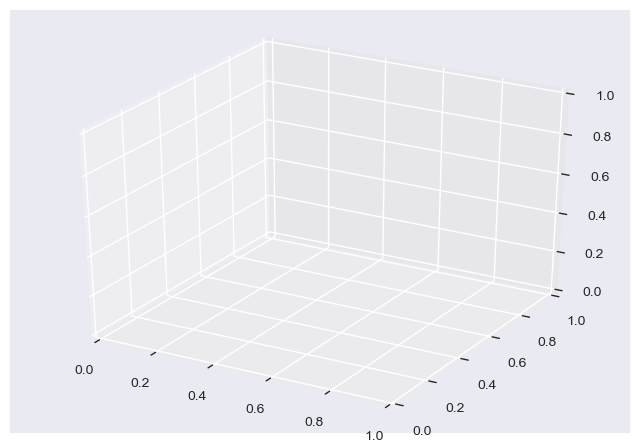

In [157]:
# from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
# X, Y, Z = make_3d_data(df)
ax.scatter( #X,Y,Z)
# ax.scatter(xs, ys, zs, c=c, marker=m)

In [124]:
# Plot a basic wireframe.
ax.scatter(X, Y, Z)#, rstride=10, cstride=10)

plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 8442 but corresponding boolean dimension is 25326

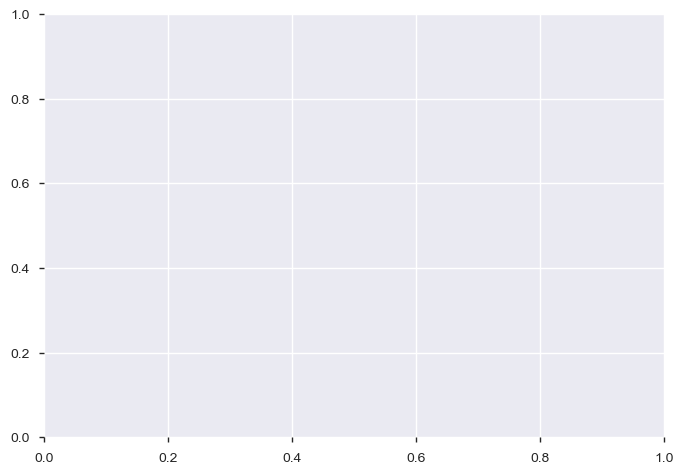

In [90]:
sns.stripplot(x=x_cols,y=data=df_plot)

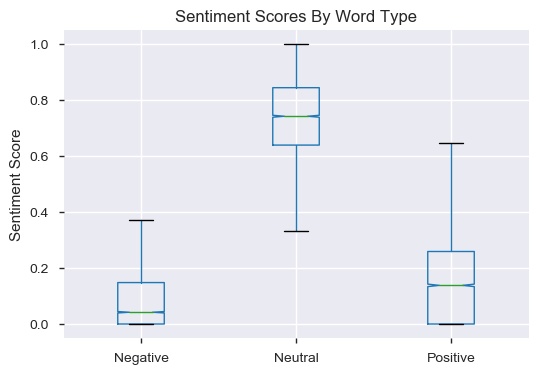

In [36]:
with plt.style.context('seaborn-notebook'):
    boxplot = df_sents.boxplot(column=['neg','neu','pos'],notch=True,figsize=(6,4))
    boxplot.set_xticklabels(['Negative','Neutral','Positive']);
    boxplot.set_title('Sentiment Scores By Word Type')
    boxplot.set_ylabel('Sentiment Score')

In [32]:
# # Plotting sentiment scores
# df_sents=df
# with plt.style.context('seaborn-notebook'):
    
#     fig,ax =plt.subplots(nrows=1,ncols=2,figsize=(6,4))
    
#     from scipy.stats import sem
#     y_bars1 = np.mean(df_sents[['neg','neu','pos']])
#     y_errbars1 = sem(df_sents[['neg','neu','pos']])
    
#     ax[0].set_ylim([0,1])
#     ax[0].set_ylabel('Sentiment Score')
#     ax[0].set_title('Sentiment Scores by Sentiment Type',fontsize=10)
#     ax[0].bar(x=['Negative','Neutral','Positive'],height=y_bars1, color='blue',yerr=y_errbars1)
# #     ax[0].boxplot(df_sents['neg'],df_sents['neu'],df_sents['pos'])
        
#     plt.tight_layout()


In [50]:
## Exporting tweet df for later use with stock market data.
df.to_csv('data/trump_twitter_archive_df.csv', encoding='utf-8')



# Stock Market Data

- https://github.com/RomelTorres/alpha_vantage
    - https://alpha-vantage.readthedocs.io/en/latest/
- https://www.alphavantage.co/documentation/

In [37]:
api_key='USZEY9DAE39DLCKG'

In [ ]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key=api_key, output_format='pandas',indexing_type='date')

# data, meta_data = ts.get_intraday(symbol='GOOGL',interval='30min', outputsize='full')

data, meta_data = ts.get_daily(symbol= ,outputsize='full' )

### Other Stock Market Data Sources 

- [For historical summary of big 3 summary states](https://www.investopedia.com/ask/answers/find-historical-stock-index-quotes/)

- ***https://quantquote.com/historical-stock-data***

- Standford used S&P 500 data (high temporal resolution)
    - [Yahoo Finance Source of CSV](https://finance.yahoo.com/quote/%5EGSPC/history?period1=1478494800&period2=1561003200&interval=1d&filter=history&frequency=1d&guccounter=1&guce_referrer=aHR0cHM6Ly9sb2dpbi55YWhvby5jb20v&guce_referrer_sig=AQAAAK5bD04nJ5vxY-XHKLx96wkWJXkzjTBQslzfZJ-oUdDz8isX1mCQ6sr844k3uNdKkI5kal1N86ukk3J2YITpVD5So7FWZw5iHcIzOnFEky4E3KzWKsqhtzO2gbSS1N3Ul4B6g5EN0jWRgphnhMw2rBRZaXyGS4G-t-RfFWqlOD1L)
        

### Using Yahoo Daily S&P500 with Tweets

- **I think it is important to maintain the sequence of tweets, so upsampling to match the tweets will better reflect the consequences of a linear series of messages on the overall daily performance.**
    - [ ]  Downsample tweets to minutes or hourly times series
    - [ ] Upsample the s&p500 daily rates match time index frequency of downsampled tweets
    

In [206]:
twitter_df = pd.read_csv('data/trump_twitter_archive_df.csv', encoding='utf-8', index_col=0)
twitter_df['date'] = pd.to_datetime(twitter_df['date'])
twitter_df.set_index('date',inplace=True)
twitter_df.head()

,source,content,retweet_count,favorite_count,is_retweet,id_str,case_ratio,content_raw,has_RT,starts_RT,...,content_stopped,tokens_stopped,hashtag_strings,mention_strings,sentiment_scores,compound_score,sentiment_class,neg,neu,pos
date,,,,,,,,,,,,,,,,,,,,,
2019-06-20 00:12:31,Twitter for iPhone,Since Election Day 2016 Stocks up almost 50% S...,16742,64362,False,1141499029727121408,0.05495,Since Election Day 2016 Stocks up almost 50% S...,False,False,...,since election day stocks almost stocks gained...,"['since', 'election', 'day', 'stocks', 'almost...",,@LouDobbs @TuckerCarlson @seanhannity @Ingraha...,"{'neg': 0.054, 'neu': 0.773, 'pos': 0.173, 'co...",0.7209,pos,0.054,0.773,0.173
2019-06-19 23:01:59,Twitter for iPhone,Congratulations to President Lopez Obrador — M...,20490,87423,False,1141481280653209600,0.08571,Congratulations to President Lopez Obrador — M...,False,False,...,congratulations president lopez obrador mexico...,"['congratulations', 'president', 'lopez', 'obr...",,,"{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'comp...",0.7574,pos,0.000,0.764,0.236
2019-06-19 20:39:28,Twitter for iPhone,Just returning from Orlando and Doral (Miami) ...,12693,68118,False,1141445414824136704,0.08197,Just returning from Orlando and Doral (Miami) ...,False,False,...,returning orlando doral miami florida heading ...,"['returning', 'orlando', 'doral', 'miami', 'fl...",,,"{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp...",0.9081,pos,0.000,0.695,0.305
2019-06-19 20:29:24,Twitter for iPhone,I will be interviewed LIVE tonight by on ...,10586,48786,False,1141442879518322689,0.12987,I will be interviewed LIVE tonight by @seanhan...,False,False,...,interviewed live tonight p enjoy,"['interviewed', 'live', 'tonight', 'p', 'enjoy']",,@seanhannity @FoxNews,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.5411,pos,0.000,0.741,0.259
2019-06-19 19:48:04,Twitter for iPhone,....asking Hillary Clinton why she deleted and...,21712,93137,False,1141432478491717632,0.06604,....asking Hillary Clinton why she deleted and...,False,False,...,asking hillary clinton deleted acid washed ema...,"['asking', 'hillary', 'clinton', 'deleted', 'a...",,,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'comp...",-0.5719,neg,0.121,0.879,0.000


In [207]:
# Yahoo data source
stocks_df = pd.read_excel('data/yahoo_finance_S&P500_GSPC_11062016_to_06192019.xlsx')
stocks_df.set_index('Date',inplace=True)
stocks_df.head()
stocks_df.index

DatetimeIndex(['2016-11-07', '2016-11-08', '2016-11-09', '2016-11-10',
               '2016-11-11', '2016-11-14', '2016-11-15', '2016-11-16',
               '2016-11-17', '2016-11-18',
               ...
               '2019-06-07', '2019-06-10', '2019-06-11', '2019-06-12',
               '2019-06-13', '2019-06-14', '2019-06-17', '2019-06-18',
               '2019-06-19', '2019-06-20'],
              dtype='datetime64[ns]', name='Date', length=658, freq=None)

Text(0, 0.5, 'Index')

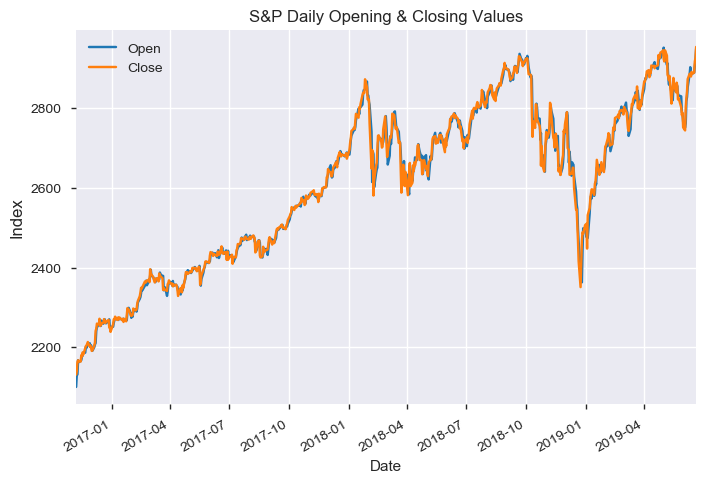

In [208]:
stocks_plot = stocks_df[['Open','Close']].plot()
stocks_plot.set_title('S&P Daily Opening & Closing Values');
stocks_plot.set_ylabel('Index', fontsize=12)


In [219]:
def combine_time_axes(df1, df2, frequency='H'):
#     df1_idx = df1.index
#     df1_min,df1_max  = df1_idx.min(), df1_idx.max()
    
#     df2_idx = df1.index
#     df2_min,df2_max  = df2_idx.min(), df2_idx.max()
    df1.resample(frequency,inplace=True)
    df2.resample(frequency,inplace=True)

    
    df_comb = pd.concat([df1,df2], axis=0)
#     df_1
#     time_ranges = [df1_min, df1_max, df2_min, df2_max]
    
    return df_comb
    
#     time_min= np.min(time_ranges)
#     time_max = np.max(time_ranges) 
#     return time_min,time_max

In [220]:
test = combine_time_axes(twitter_df, stocks_df)
display(test.sort_index().head(2))
display(test.sort_index().tail(2))
# test.ffill(axis=0).head()

TypeError: resample() got an unexpected keyword argument 'inplace'

In [221]:
# ProfileReport(test)

In [ ]:
# Downsample 
# shared_index = pd.date_range(min)